In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('/Users/chizurumokereolujie/Documents/AI RELATED/MACHINE LEARNING CLASS/Datasets/telco_customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [7]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
len(df.loc[df['TotalCharges'] == ' '] )

11

In [9]:
df.loc[(df['TotalCharges'] == ' '), 'TotalCharges'] = 0

In [10]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [13]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
df.replace(' ', "_", regex=True, inplace=True)

In [15]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No_phone_service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No_phone_service,DSL,Yes,...,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber_optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber_optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber_optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit_card_(automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No_phone_service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed_check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber_optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One_year,No,Bank_transfer_(automatic),56.15,3487.95,No


In [16]:
df.loc[(df['Churn'] == 'Yes'), 'Churn'] = 1
df.loc[(df['Churn'] == 'No'), 'Churn'] = 0

In [17]:
X = df.drop('Churn', axis=1).copy()
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65


In [18]:
Y = df['Churn'].copy()
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: object

In [19]:
pd.get_dummies(X, columns=['PaymentMethod'], dtype=
               int).head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,7590-VHVEG,Female,0,Yes,No,1,No,No_phone_service,DSL,No,...,No,No,Month-to-month,Yes,29.85,29.85,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One_year,No,56.95,1889.50,0,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,53.85,108.15,0,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No_phone_service,DSL,Yes,...,No,No,One_year,No,42.30,1840.75,1,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber_optic,No,...,No,No,Month-to-month,Yes,70.70,151.65,0,0,1,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
X_encoded = pd.get_dummies(X, columns=['customerID',
                                       'gender',
                                       'SeniorCitizen',
                                       'Partner',
                                       'Dependents',
                                       'PhoneService',
                                       'MultipleLines',
                                       'InternetService',
                                       'OnlineSecurity',
                                       'OnlineBackup',
                                       'DeviceProtection',
                                       'TechSupport',
                                       'StreamingTV',
                                       'StreamingMovies',
                                       'Contract',
                                       'PaperlessBilling',
                                       'PaymentMethod'], dtype=int)

In [22]:
X_encoded.head()

,tenure,MonthlyCharges,TotalCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,1,29.85,29.85,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [23]:
Y.unique()

array([0, 1], dtype=object)

In [24]:
sum(Y) / len(Y)

0.2653698707936959

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, random_state=42, stratify=Y)

In [26]:
sum(Y_train)/ len(Y_train)

0.2654297614539947

In [27]:
sum(Y_test)/ len(Y_test)

0.26519023282226006

In [28]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42, verbose=True, early_stopping_rounds=10, eval_metric = 'aucpr')



In [29]:
clf_xgb.fit(X_train, Y_train, eval_set = [(X_test, Y_test)])

[0]	validation_0-aucpr:0.64097
[1]	validation_0-aucpr:0.63939
[2]	validation_0-aucpr:0.63733
[3]	validation_0-aucpr:0.63760
[4]	validation_0-aucpr:0.64161


/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:10:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	validation_0-aucpr:0.63695
[6]	validation_0-aucpr:0.63588
[7]	validation_0-aucpr:0.63674
[8]	validation_0-aucpr:0.63375
[9]	validation_0-aucpr:0.63513
[10]	validation_0-aucpr:0.63511
[11]	validation_0-aucpr:0.63528
[12]	validation_0-aucpr:0.63356
[13]	validation_0-aucpr:0.63530


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=None, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [30]:
import xgboost as xgb

clf_xgb = xgb.XGBClassifier(
    seed=42,
    objective='binary:logistic',  # Fixed the syntax
    gamma=0.25,
    learning_rate=0.1,  # Correct parameter name is 'learning_rate'
    max_depth=4,
    reg_lambda=10,
    scale_pos_weight=3,
    subsample=1,
    colsample_bytree=0.5,
    early_stopping_rounds=10,
    eval_metric = 'aucpr'
    
)

In [31]:
clf_xgb.fit(X_train, Y_train, verbose=True, eval_set=[(X_test, Y_test)])

[0]	validation_0-aucpr:0.58475
[1]	validation_0-aucpr:0.61545
[2]	validation_0-aucpr:0.61872
[3]	validation_0-aucpr:0.62397
[4]	validation_0-aucpr:0.62303
[5]	validation_0-aucpr:0.62432
[6]	validation_0-aucpr:0.62325
[7]	validation_0-aucpr:0.62401
[8]	validation_0-aucpr:0.62267
[9]	validation_0-aucpr:0.62191
[10]	validation_0-aucpr:0.62265
[11]	validation_0-aucpr:0.63320
[12]	validation_0-aucpr:0.63188
[13]	validation_0-aucpr:0.64256
[14]	validation_0-aucpr:0.64394
[15]	validation_0-aucpr:0.64246
[16]	validation_0-aucpr:0.64223
[17]	validation_0-aucpr:0.64285
[18]	validation_0-aucpr:0.64032
[19]	validation_0-aucpr:0.64003
[20]	validation_0-aucpr:0.64321
[21]	validation_0-aucpr:0.64438
[22]	validation_0-aucpr:0.64128
[23]	validation_0-aucpr:0.64281
[24]	validation_0-aucpr:0.64736
[25]	validation_0-aucpr:0.64930
[26]	validation_0-aucpr:0.64862
[27]	validation_0-aucpr:0.65050
[28]	validation_0-aucpr:0.65103
[29]	validation_0-aucpr:0.65066
[30]	validation_0-aucpr:0.65140
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
bst = clf_xgb.get_booster()

In [33]:
clf_xgb.best_iteration

71

In [34]:
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s : ' % importance_type, bst.get_score(importance_type=importance_type))

weight :  {'tenure': 147.0, 'MonthlyCharges': 155.0, 'TotalCharges': 155.0, 'gender_Female': 22.0, 'gender_Male': 11.0, 'SeniorCitizen_0': 19.0, 'SeniorCitizen_1': 14.0, 'Partner_No': 9.0, 'Partner_Yes': 4.0, 'Dependents_No': 14.0, 'Dependents_Yes': 9.0, 'PhoneService_No': 14.0, 'PhoneService_Yes': 9.0, 'MultipleLines_No': 14.0, 'MultipleLines_No_phone_service': 1.0, 'MultipleLines_Yes': 17.0, 'InternetService_DSL': 17.0, 'InternetService_Fiber_optic': 23.0, 'InternetService_No': 7.0, 'OnlineSecurity_No': 28.0, 'OnlineSecurity_No_internet_service': 3.0, 'OnlineSecurity_Yes': 12.0, 'OnlineBackup_No': 26.0, 'OnlineBackup_No_internet_service': 3.0, 'OnlineBackup_Yes': 11.0, 'DeviceProtection_No': 6.0, 'DeviceProtection_Yes': 9.0, 'TechSupport_No': 27.0, 'TechSupport_Yes': 22.0, 'StreamingTV_No': 12.0, 'StreamingTV_Yes': 12.0, 'StreamingMovies_No': 15.0, 'StreamingMovies_Yes': 20.0, 'Contract_Month-to-month': 24.0, 'Contract_One_year': 15.0, 'Contract_Two_year': 19.0, 'PaperlessBilling_No'

In [35]:
node_params = {'shape':'box', 'style': 'filled, rounded', 'fillcolor': '#78cbe'}

In [36]:
leaf_params = {'shape':'box', 'style':'filled', 'fillcolor':'#e48038'}

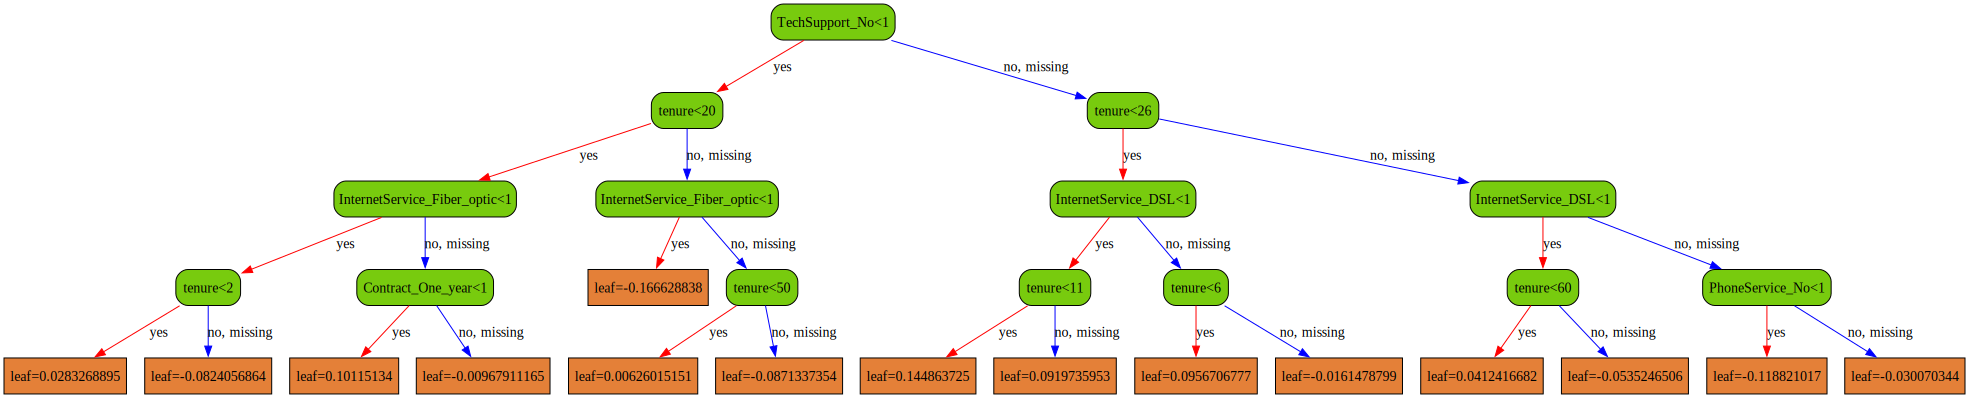

In [37]:
xgb.to_graphviz(clf_xgb, num_trees=0, size="10, 10", condition_node_params=node_params, leaf_node_params=leaf_params)

In [38]:
xgb_prediction_testing = clf_xgb.predict(X_test)


In [39]:
Y_test = np.array(Y_test)

In [40]:
print(type(Y_test), type(xgb_prediction_testing))


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [41]:
print(Y_test[:5], xgb_prediction_testing[:5]) 

[0 0 0 0 0] [0 0 0 1 0]


In [42]:
xgb_prediction_testing

array([0, 0, 0, ..., 0, 1, 1])

In [43]:
Y_test = Y_test.astype(int)

In [44]:
xgb_prediction_testing_accuracy = accuracy_score(xgb_prediction_testing, Y_test)

In [45]:
print(f"Accuracy: {xgb_prediction_testing_accuracy}")

Accuracy: 0.7484383872799546


In [46]:
Y_train = Y_train.astype(int)

In [47]:
xgb_prediction_training = clf_xgb.predict(X_train)

In [48]:
xgb_prediction_training_accuracy = accuracy_score(Y_train, xgb_prediction_training)

In [49]:
print(f"Accuracy: {xgb_prediction_training_accuracy:.2f}")

Accuracy: 0.77
